<a href="https://colab.research.google.com/github/ferdouszislam/Weather-WaterLevel-Prediction-ML/blob/main/Notebooks/apply_mlAlgo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
# random seed
RAND_SEED = 42

## Regression

In [9]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from math import sqrt

In [10]:
def train_regression(model, param_grid, df, cls):

  # 10-fold cross validation
  cv = KFold(n_splits=10, random_state=RAND_SEED, shuffle= True)

  X_train = df.drop(columns=cls)
  y_train = df[cls]

  # use gridsearch to check all values in param_grid
  model = GridSearchCV(model, param_grid, scoring=['r2', 'neg_mean_absolute_error', 'neg_root_mean_squared_error'], refit='r2', cv=cv)
  # fit model to data
  model.fit(X_train, y_train)

  selected_hyperparams = model.best_params_
  train_r2 = round(model.cv_results_['mean_test_r2'][model.best_index_], 4)
  train_mae = -1*round(model.cv_results_['mean_test_neg_mean_absolute_error'][model.best_index_], 4)
  train_rmse = -1*round(model.cv_results_['mean_test_neg_root_mean_squared_error'][model.best_index_], 4)

  return model, selected_hyperparams, train_r2, train_mae, train_rmse

def eval_regression(model, df, cls):

  X_test = df.drop(columns=cls)
  y_test = df[cls]

  y_test_pred = model.predict(X_test)
  test_r2 = round(r2_score(y_test, y_test_pred), 4)
  test_mae = round(mean_absolute_error(y_test, y_test_pred), 4)
  test_rmse = round(sqrt(mean_squared_error(y_test, y_test_pred)), 4)

  return test_r2, test_mae, test_rmse

### Load the datasets

In [11]:
# Load the train dataset
train_df = pd.read_csv('https://raw.githubusercontent.com/ferdouszislam/Weather-WaterLevel-Prediction-ML/main/Datasets/brri-datasets/final-dataset/train/brri-weather_train_regression.csv')
X_train = train_df.drop(columns='Rainfall (mm)')
y_train = train_df['Rainfall (mm)']

# Load test set
test_df = pd.read_csv('https://raw.githubusercontent.com/ferdouszislam/Weather-WaterLevel-Prediction-ML/main/Datasets/brri-datasets/final-dataset/test/brri-weather_test_regression.csv')
X_test = test_df.drop(columns='Rainfall (mm)')
y_test = test_df['Rainfall (mm)']

### Apply Linear Regression

In [12]:
# Linear Regression Model
model = LinearRegression()
# dictionary of hyper-parameters
param_grid = {}

# train model
model, selected_hyperparams, train_r2, train_mae, train_rmse = train_regression(model, param_grid, train_df, 'Rainfall (mm)')
print(f'Selected hyperparameters: {selected_hyperparams}')
# performance on the train set
print(f'Train set performance: r2-score={train_r2}, mae={train_mae}, rmse={train_rmse}')

print()

# test model
test_r2, test_mae, test_rmse = eval_regression(model, test_df, 'Rainfall (mm)')
# performance on the test set
print(f'Test set performance: r2-score={test_r2}, mae={test_mae}, rmse={test_rmse}')

Selected hyperparameters: {}
Train set performance: r2-score=0.1807, mae=7.3243, rmse=13.5442

Test set performance: r2-score=0.1076, mae=7.8221, rmse=16.3342


### Apply Ridge Regression

In [13]:
# Ridge Regression Model
model = Ridge(random_state=RAND_SEED)
# dictionary of hyper-parameters
alpha_vals = [1.0]
for i in range(1, 4):
  b = 1.0/10**i
  for j in range(1, 10):
    alpha_vals.append(round(b*j, 3))
solvers = ['sparse_cg', 'cholesky', 'svd', 'lsqr', 'sag', 'saga']
param_grid = {'alpha': alpha_vals, 'solver': solvers}

# train model
model, selected_hyperparams, train_r2, train_mae, train_rmse = train_regression(model, param_grid, train_df, 'Rainfall (mm)')
print(f'Selected hyperparameters: {selected_hyperparams}')
# performance on the train set
print(f'Train set performance: r2-score={train_r2}, mae={train_mae}, rmse={train_rmse}')

print()

# test model
test_r2, test_mae, test_rmse = eval_regression(model, test_df, 'Rainfall (mm)')
# performance on the test set
print(f'Test set performance: r2-score={test_r2}, mae={test_mae}, rmse={test_rmse}')

Selected hyperparameters: {'alpha': 1.0, 'solver': 'lsqr'}
Train set performance: r2-score=0.1818, mae=7.3124, rmse=13.5355

Test set performance: r2-score=0.1075, mae=7.8176, rmse=16.3356


## Classification

In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [15]:
def train_classification(model, param_grid, df, cls):

  X_train = df.drop(columns=cls)
  y_train = df[cls]

  # 10-fold cross validation
  cv = StratifiedKFold(n_splits=10, random_state=RAND_SEED, shuffle= True)

  # use gridsearch to check all values in param_grid
  model = GridSearchCV(model, param_grid, scoring=['accuracy', 'f1_macro'], refit='accuracy', cv=cv)
  # fit model to data
  model.fit(X_train, y_train)

  selected_hyperparams = model.best_params_
  train_accuracy = round(model.cv_results_['mean_test_accuracy'][model.best_index_], 4)
  train_f1 = round(model.cv_results_['mean_test_f1_macro'][model.best_index_], 4)
  # train_auc = round(model.cv_results_['mean_test_roc_auc'][model.best_index_], 4)

  return model, selected_hyperparams, train_accuracy, train_f1

def eval_classification(model, df, cls):
  X_test = df.drop(columns=cls)
  y_test = df[cls]

  y_test_pred = model.predict(X_test)
  test_accuracy = round(accuracy_score(y_test, y_test_pred), 4)
  test_f1 = round(f1_score(y_test, y_test_pred, average='macro'), 4)
  # test_auc = round(roc_auc_score(y_test, y_test_pred), 4)

  return test_accuracy, test_f1

def showEvalutationGraph_classification(ModelClass, X, y, x_axis_param_name, x_axis_param_vals, selected_x_axis_param_val, other_model_params):
  cv = StratifiedKFold(n_splits=10, random_state=RAND_SEED, shuffle= True)

  accuracies = []
  f1s = []
  # aucs = []

  for x_axis_param_val in x_axis_param_vals:
    model_params = other_model_params
    model_params[x_axis_param_name] = x_axis_param_val

    model = ModelClass(**model_params)

    accuracy_segments = cross_val_score(model, X, y, scoring='accuracy',cv=cv, n_jobs=1)
    f1_segments = cross_val_score(model, X, y, scoring='f1_macro',cv=cv, n_jobs=1)
    # auc_segments = cross_val_score(model, X, y, scoring='roc_auc',cv=cv, n_jobs=1)
    accuracies.append(np.mean(accuracy_segments))
    f1s.append(np.mean(f1_segments))
    # aucs.append(np.mean(auc_segments))

  plt.figure(figsize =(15,9))
  plt.plot(x_axis_param_vals, accuracies, 'ro-',  x_axis_param_vals, f1s ,'bv-') #, x_axis_param_vals, aucs,'yo-')
  plt.axvline(x=selected_x_axis_param_val, color='k', linestyle='--')
  plt.legend(['Accuracy','Macro F1', f'selected value ({x_axis_param_name}={selected_x_axis_param_val})'], fontsize=16)
  plt.xlabel(x_axis_param_name, fontsize=18)
  plt.ylabel('Accuracy, Macro F1', fontsize=18)
  plt.xticks(fontsize=18)
  plt.yticks(fontsize=18)
  plt.show()

### Load the datasets

In [16]:
# Load the train dataset
train_df = pd.read_csv('https://raw.githubusercontent.com/ferdouszislam/Weather-WaterLevel-Prediction-ML/main/Datasets/brri-datasets/final-dataset/train/brri-weather_train_classification.csv')
X_train = train_df.drop(columns='Rainfall')
y_train = train_df['Rainfall']

# Load test set
test_df = pd.read_csv('https://raw.githubusercontent.com/ferdouszislam/Weather-WaterLevel-Prediction-ML/main/Datasets/brri-datasets/final-dataset/test/brri-weather_test_classification.csv')
X_test = test_df.drop(columns='Rainfall')
y_test = test_df['Rainfall']

### Apply Decision Tree

In [17]:
# Decision Tree Model
model = DecisionTreeClassifier(random_state=RAND_SEED)
# dictionary of hyper-parameters
max_depths = [x for x in range (1, 31)]
param_grid = {'max_depth': max_depths, 'criterion': ['gini', 'entropy'], 'class_weight': [None, 'balanced']}

# train model
model, selected_hyperparams, train_accuracy, train_f1 = train_classification(model, param_grid, train_df, 'Rainfall')
print(f'Selected hyperparameters: {selected_hyperparams}')
# performance on the train set
print(f'Train set performance: accuracy={train_accuracy}, macro-f1={train_f1}')

print()

# test model
test_accuracy, test_f1 = eval_classification(model, test_df, 'Rainfall')
# performance on the test set
print(f'Test set performance: accuracy={test_accuracy}, macro-f1={test_f1}')

Selected hyperparameters: {'class_weight': None, 'criterion': 'gini', 'max_depth': 7}
Train set performance: accuracy=0.7146, macro-f1=0.5299

Test set performance: accuracy=0.7123, macro-f1=0.5761


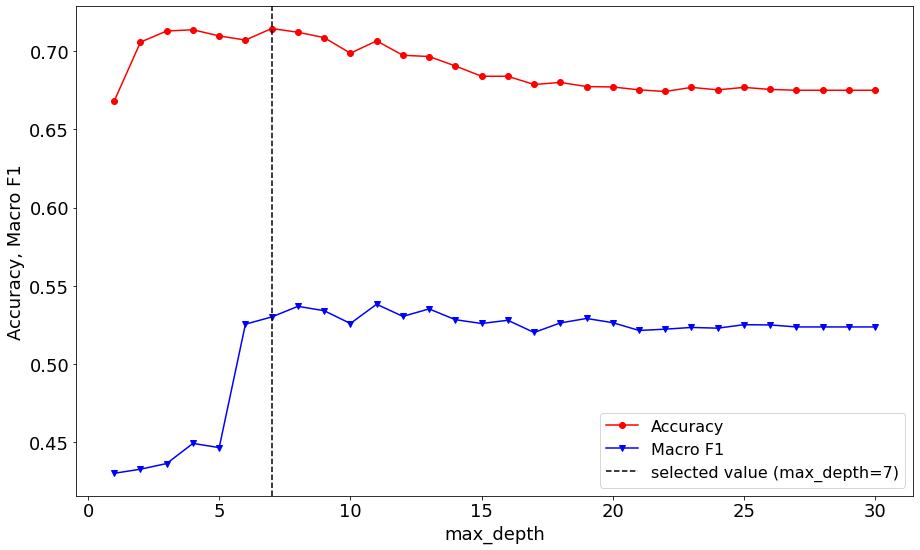

In [18]:
model_params = dict(criterion='gini', random_state=RAND_SEED)
showEvalutationGraph_classification(DecisionTreeClassifier, X_train, y_train, 'max_depth', max_depths, 7, model_params)

### Apply K-Nearest Neighbor

In [19]:
from sklearn.neighbors import KNeighborsClassifier

In [20]:
# KNN Model
model = KNeighborsClassifier(metric='minkowski')
# dictionary of hyper-parameters
n_neighbors = [x for x in range (1, 41)]
param_grid = {'n_neighbors': n_neighbors, 'weights': ['uniform', 'distance'], 'p': [1, 2, 3, 4, 5]}

# train model
model, selected_hyperparams, train_accuracy, train_f1 = train_classification(model, param_grid, train_df, 'Rainfall')
print(f'Selected hyperparameters: {selected_hyperparams}')
# performance on the train set
print(f'Train set performance: accuracy={train_accuracy}, macro-f1={train_f1}')

print()

# test model
test_accuracy, test_f1 = eval_classification(model, test_df, 'Rainfall')
# performance on the test set
print(f'Test set performance: accuracy={test_accuracy}, macro-f1={test_f1}')

Selected hyperparameters: {'n_neighbors': 33, 'p': 1, 'weights': 'distance'}
Train set performance: accuracy=0.7294, macro-f1=0.5363

Test set performance: accuracy=0.7482, macro-f1=0.5557


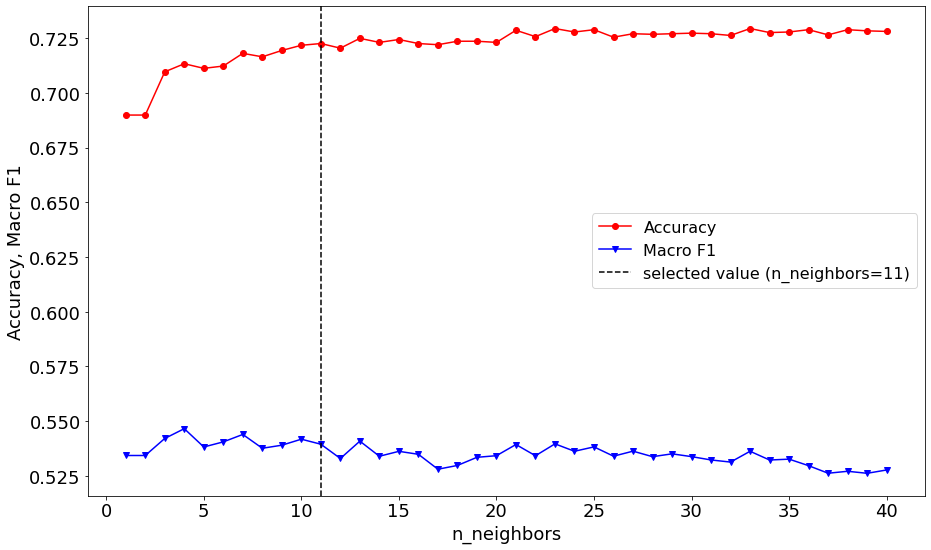

In [21]:
model_params = dict(metric='minkowski', weights='distance', p=1)
showEvalutationGraph_classification(KNeighborsClassifier, X_train, y_train, 'n_neighbors', n_neighbors, 11, model_params)